# En clase sesión 8

In [6]:
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/crimenes_locacion.csv')
df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


<AxesSubplot:xlabel='latitud', ylabel='longitud'>

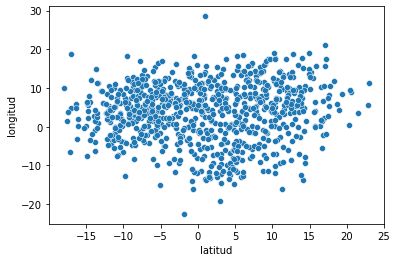

In [5]:
sns.scatterplot(data=df,x='latitud',y='longitud')

In [7]:
from sklearn.cluster import KMeans

#k=6
k_means=KMeans(n_clusters=6,max_iter=10_000)
k_means.fit(df[['latitud','longitud']])

KMeans(max_iter=10000, n_clusters=6)

In [8]:
centers = k_means.cluster_centers_
centers

array([[12.75761722,  4.46923008],
       [-9.81481558,  0.8804643 ],
       [ 1.28449279,  2.28543337],
       [-5.39392643,  9.87928464],
       [ 8.1614813 , 12.78745855],
       [ 4.6243732 , -8.92529877]])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='latitud', ylabel='longitud'>

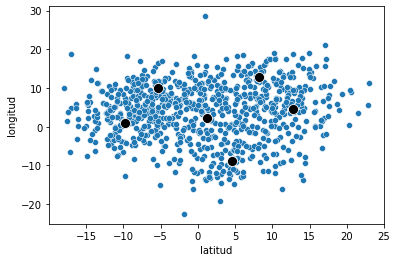

In [9]:
sns.scatterplot(df['latitud'],df['longitud'])
sns.scatterplot(centers[:,0],centers[:,1],color='black',s=100)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


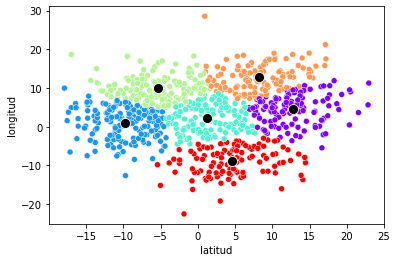

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot()
clasificacion = k_means.predict(df[['latitud','longitud']])
sns.scatterplot(df['latitud'],df['longitud'],hue=clasificacion,palette='rainbow',ax=ax)
sns.scatterplot(centers[:,0],centers[:,1],color='black',s=100,ax=ax)
ax.get_legend().remove()

In [14]:
df['clasificacion'] = clasificacion

In [16]:
#8 a)
df['contador'] = 1
grouped_by_class = df.groupby('clasificacion')['contador'].sum()
grouped_by_class

clasificacion
0    125
1    181
2    144
3    162
4    122
5    115
Name: contador, dtype: int64

In [ ]:
#8 b)
grouped_by_product = df.groupby('clasficacion')['']

## Regresión logística

In [21]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/breast_cancer_wisconsin.csv',index_col=0)
df = df.drop(columns='Unnamed: 32')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
    df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
    df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,daignosis
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [25]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [37]:
logreg = LogisticRegression(max_iter=10_000)
logreg.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [38]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [39]:
logreg.score(X_test,y_test)

0.9766081871345029

## Matriz de confusión

In [40]:
from sklearn import metrics

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[109,   3],
       [  1,  58]])

Text(0.5, 33.0, 'Estimado')

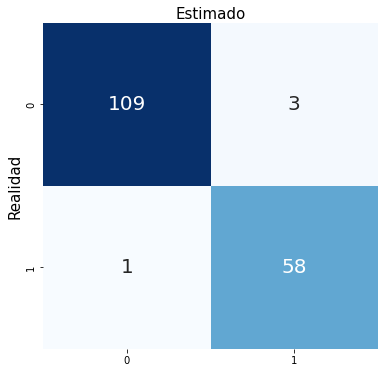

In [47]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g',cmap='Blues',cbar=False,annot_kws={'size':20})

ax.xaxis.set_label_position('top')
plt.ylabel('Realidad',fontsize=15)
plt.xlabel('Estimado',fontsize=15)

In [ ]:
#presicion = 
#exactitud:
#sensibilidad:
#especifidad:

In [49]:
print(metrics.precision_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.9508196721311475
0.9766081871345029
0.9830508474576272


In [51]:
tn, fp, fn , tp = cnf_matrix.ravel()
print(f'especifidad: {tn / (tn + fp)}')

especifidad: 0.9732142857142857


In [52]:
from sklearn.metrics import roc_curve, auc

In [53]:
y_pred_prob = logreg.predict_log_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1499: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


In [54]:
roc_auc

0.9993946731234866

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>